Coder: Gabriel Levin  <br />
Date: Jan 5th, 2022  <br />
Purpose: Identify the amount of flooding risk in Displacement Site/Host Communities  <br />
Data:  <br />
* Fathom 2020  <br />
* IOM_DTM (UNHCR?)  <br />

TOC:  <br />
    1. Reclass Raw Pluvial Raster to Exclude NoData and Water  <br />
    2. Reclass Raw Fluvial Raster to Exclude NoData and Water  <br />
    3. Zonal Statistics: IDPs w/ Flood Data  <br />

In [38]:
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import numpy as np
from rasterstats import zonal_stats
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt


In [2]:
pluvial_raw = rio.open(r'D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\RawData\P_1in100(1).tif')
fluvial_raw = rio.open(r'D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\RawData\FU_1in100(1).tif')

In [3]:
IDP_dir = r"D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\RawData\Displacement\Displacement\IOM DTM.shp"
IDP = gpd.read_file(IDP_dir)

## 1. Reclass Raw Pluvial Raster to Exclude NoData and Water

In [4]:
pluvial_rc = pluvial_raw.read(1)

In [7]:
pluvial_rc[np.where(pluvial_rc == -9999)] = 0
pluvial_rc[np.where(pluvial_rc == 999)] = 0

In [8]:
with rio.open(r'D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\Theme2\IDPvsFloods\PluvialFathom100_noWater.tif', 'w',
             driver= pluvial_raw.driver,
             height = pluvial_raw.height,
             width = pluvial_raw.width,
             count = pluvial_raw.count,
             crs = pluvial_raw.crs,
             transform = pluvial_raw.transform,
             dtype = 'float32'
)as dst:
    dst.write(pluvial_rc,1)

## 2. Reclass Raw Fluvial Raster to Exclude NoData and Water

In [9]:
fluvial_rc = fluvial_raw.read(1)

In [10]:
fluvial_rc[np.where(fluvial_rc == -9999)] = 0
fluvial_rc[np.where(fluvial_rc == 999)] = 0

In [11]:
with rio.open(r'D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\Theme2\IDPvsFloods\FluvialUndefendedFathom100_noWater.tif', 'w',
             driver= fluvial_raw.driver,
             height = fluvial_raw.height,
             width = fluvial_raw.width,
             count = fluvial_raw.count,
             crs = fluvial_raw.crs,
             transform = fluvial_raw.transform,
             dtype = 'float32'
)as dst:
    dst.write(pluvial_rc,1)

## 3. Zonal Statistics: IDPs w/ Flood Data

### 3.1 IDPs w/ Pluvial Data

In [12]:
affine = pluvial_raw.transform

In [13]:
IDP_wPlu = zonal_stats(IDP, pluvial_rc, affine=affine, stats="sum")

C:\Users\glev2\anaconda3\envs\dreamenv\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [14]:
IDP_wPlu_sumonly = []
for i in IDP_wPlu:
    IDP_wPlu_sumonly.append(i['sum'])

In [19]:
np.amax(IDP_wPlu_sumonly)

5.77142333984375

In [25]:
IDP['Plu_m'] = IDP_wPlu_sumonly

### 3.2 IDPs w/ Fluvial Data

In [26]:
affine = fluvial_raw.transform

In [27]:
IDP_wFlu = zonal_stats(IDP, fluvial_rc, affine=affine, stats="sum")

In [28]:
IDP_wFlu_sumonly = []
for i in IDP_wFlu:
    IDP_wFlu_sumonly.append(i['sum'])

In [29]:
np.amax(IDP_wFlu_sumonly)

4.550774574279785

In [30]:
IDP['Flu_m']  = IDP_wFlu_sumonly

In [32]:
IDP['Tot_flood'] = IDP['Plu_m']+ IDP['Flu_m']

In [33]:
IDP

,state_pcod,state_name,location_s,county_pco,county_nam,payam_pcod,payam_name,village_id,alternate_,location_t,...,Estimate13,Estimate14,Estimate15,Source_Rou,Location r,Admin leve,geometry,Plu_m,Flu_m,Tot_flood
0,SS01,Central Equatoria,ssid_SS0101_0002,SS0101,Juba,SS010101,Bungu,Belle,None,Host community,...,0,132,792,R9-September 2020,None,No changes,POINT (31.38855 4.64919),0.000000,0.0,0.000000
1,SS01,Central Equatoria,ssid_SS0101_0003,SS0101,Juba,SS010101,Bungu,Bungu Center,None,Host community,...,0,219,1011,R9-September 2020,None,No changes,POINT (31.39612 4.66440),0.000000,0.0,0.000000
2,SS01,Central Equatoria,ssid_SS0101_0045,SS0101,Juba,SS010101,Bungu,Kworijik Bungu,None,Host community,...,0,198,992,R9-September 2020,None,No changes,POINT (31.33384 4.60083),0.000000,0.0,0.000000
3,SS01,Central Equatoria,ssid_SS0101_0013,SS0101,Juba,SS010102,Dolo,Kuda,None,Host community,...,0,181,997,R9-September 2020,None,No changes,POINT (31.25497 4.95238),0.000000,0.0,0.000000
4,SS01,Central Equatoria,ssid_SS0101_0035,SS0101,Juba,SS010102,Dolo,Sirimun,None,Host community,...,0,135,741,R9-September 2020,None,No changes,POINT (31.01958 5.01381),0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,SS10,Western Equatoria,ssid_SS1010_0014,SS1010,Yambio,SS101007,Yambio,Kuzee,None,Host community,...,155,28,140,R9-September 2020,None,No changes,POINT (28.38120 4.56140),0.000000,0.0,0.000000
2850,SS10,Western Equatoria,ssid_SS1010_0017,SS1010,Yambio,SS101007,Yambio,Mokongo,None,Host community,...,35,10,50,R9-September 2020,None,No changes,POINT (28.49394 4.57501),0.000000,0.0,0.000000
2851,SS10,Western Equatoria,ssid_SS1010_0026,SS1010,Yambio,SS101007,Yambio,Napere,None,Host community,...,45,6,30,R9-September 2020,None,No changes,POINT (28.49990 4.66386),0.000000,0.0,0.000000
2852,SS10,Western Equatoria,ssid_SS1010_0035,SS1010,Yambio,SS101007,Yambio,Saura,None,Host community,...,80,20,100,R9-September 2020,None,No changes,POINT (28.38047 4.62615),0.196289,0.0,0.196289


In [34]:
IDP.to_file(r"D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\Theme2\IDPvsFloods\IOM_DTM_wFathom.shp")

<AxesSubplot:>

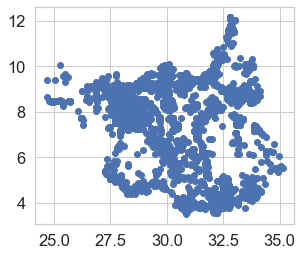

In [55]:
IDP.plot()